In [40]:
"""
Description: This code uses an Artificial RNN (LSTM: Long Short Term Memory Architecture) to predict the
closing cryptocurrency price.
We use RNN as we are processing a sequence of data, and not standalone data points.
"""

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use("fivethirtyeight")

In [41]:
df = pd.read_csv("cryptocurrencies_combined_daily.csv")
df = df[df['Cryptocurrency'] == "Ethereum"]

df

,Date,Open,High,Low,Close,Adj Close,Volume,Cryptocurrency
1827,2019-08-15,186.683502,189.462158,178.142563,188.502060,188.502060,8197244441,Ethereum
1828,2019-08-16,188.644257,188.905594,180.384842,185.440079,185.440079,7133915837,Ethereum
1829,2019-08-17,185.531662,186.703140,182.593887,185.687683,185.687683,5512696513,Ethereum
1830,2019-08-18,185.841095,197.522491,183.692245,194.493530,194.493530,5969012024,Ethereum
1831,2019-08-19,194.556030,203.560150,193.108246,203.091934,203.091934,6145148692,Ethereum
...,...,...,...,...,...,...,...,...
3649,2024-08-10,2599.582275,2642.925781,2580.661865,2610.022949,2610.022949,9361014219,Ethereum
3650,2024-08-11,2609.969727,2718.797607,2544.174805,2553.252197,2553.252197,13595441987,Ethereum
3651,2024-08-12,2553.496582,2749.135010,2513.394043,2724.431885,2724.431885,21653090666,Ethereum
3652,2024-08-13,2724.303467,2737.990479,2613.801270,2703.671875,2703.671875,16383053029,Ethereum


In [42]:
df.to_csv('Ethereum_data.csv',index=False)

In [43]:
data = df.filter(["Close"])

dataset = data.values

training_data_len = int(math.ceil(0.75 * len(dataset)))

# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01656843],
       [0.01591715],
       [0.01596982],
       ...,
       [0.55595795],
       [0.55154231],
       [0.54287333]])

In [44]:
"""
Training the model.
"""

train_data = scaled_data[:training_data_len, :]
# Split the data into x_train and y_train dataset.
x_train, y_train = [], []
d = 60

for i in range(d, len(train_data)):
    x_train.append(train_data[i - d:i, 0])
    y_train.append(train_data[i, 0])
"""
x_train array contains the past 60 days value of the closing price.
y_train contains the 61st value that we want our model to be able to predict based on those
past 60 day closing prices.
"""
print(x_train[0])
print(y_train[0])

[0.01656843 0.01591715 0.01596982 0.01784281 0.01967168 0.0182835
 0.0162259  0.01717055 0.01788805 0.01716133 0.01621542 0.01665933
 0.01635884 0.01346046 0.01253028 0.01238524 0.01315839 0.01297964
 0.01440854 0.01465356 0.01390775 0.01353005 0.01262374 0.01439052
 0.01504837 0.01500454 0.01471479 0.01448897 0.01497618 0.01499609
 0.01648409 0.01684219 0.01840001 0.02084511 0.02143732 0.02354045
 0.02285326 0.02231431 0.02146972 0.01942269 0.01223122 0.01282294
 0.01193693 0.01363509 0.01360572 0.01274016 0.01473287 0.01419437
 0.01491118 0.01373896 0.01411877 0.01398403 0.01328374 0.01501239
 0.01519004 0.01758752 0.01724005 0.01530662 0.01493588 0.01520144]
0.01624063253246943


In [45]:
# Convert the x_train and y_train dataset to NumPy arrays.
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the x_train dataset.
"""
LSTM Network expects the data to be 3-D: Number of samples, timestamps, features.
"""
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [46]:
# Build the LSTM Model Architecture.
model = Sequential()


model.add(LSTM(125, return_sequences=True, input_shape=(x_train.shape[1], 1)))

model.add(LSTM(100, return_sequences=True))
model.add(LSTM(70, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(30, return_sequences=False))


model.add(Dense(25))
model.add(Dense(1))

In [47]:
# Compile the model.
model.compile(optimizer="adam", loss="mean_absolute_error")
# Train the model.
"""
No. of forward and backward passes for backpropagation algorithm = 1.
Batch size = 1.
"""
model.fit(x_train, y_train, batch_size=5, epochs=5)

Epoch 1/5
263/263 [==============================] - 42s 110ms/step - loss: 0.0611
Epoch 2/5
263/263 [==============================] - 28s 108ms/step - loss: 0.0381
Epoch 3/5
263/263 [==============================] - 31s 117ms/step - loss: 0.0357
Epoch 4/5
263/263 [==============================] - 28s 108ms/step - loss: 0.0289
Epoch 5/5
263/263 [==============================] - 31s 117ms/step - loss: 0.0281


In [48]:
# Create the testing dataset.
test_data = scaled_data[training_data_len - d:, :] 

# Create the datasets x_test and y_test.
x_test = []
y_test = dataset[training_data_len:, :]  


for i in range(d, len(test_data)):
    x_test.append(test_data[i - d:i, 0]) 

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

 
print(x_test.shape)

# Get the model's predicted price values.
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)


(456, 60, 1)
15/15 [==============================] - 4s 56ms/step


In [49]:
# Evaluation of the model using RMSE Error.
mae = np.mean(np.abs(predictions - y_test))
mae

134.51893749571684

C:\Users\uttka\AppData\Local\Temp\ipykernel_2632\1096521284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


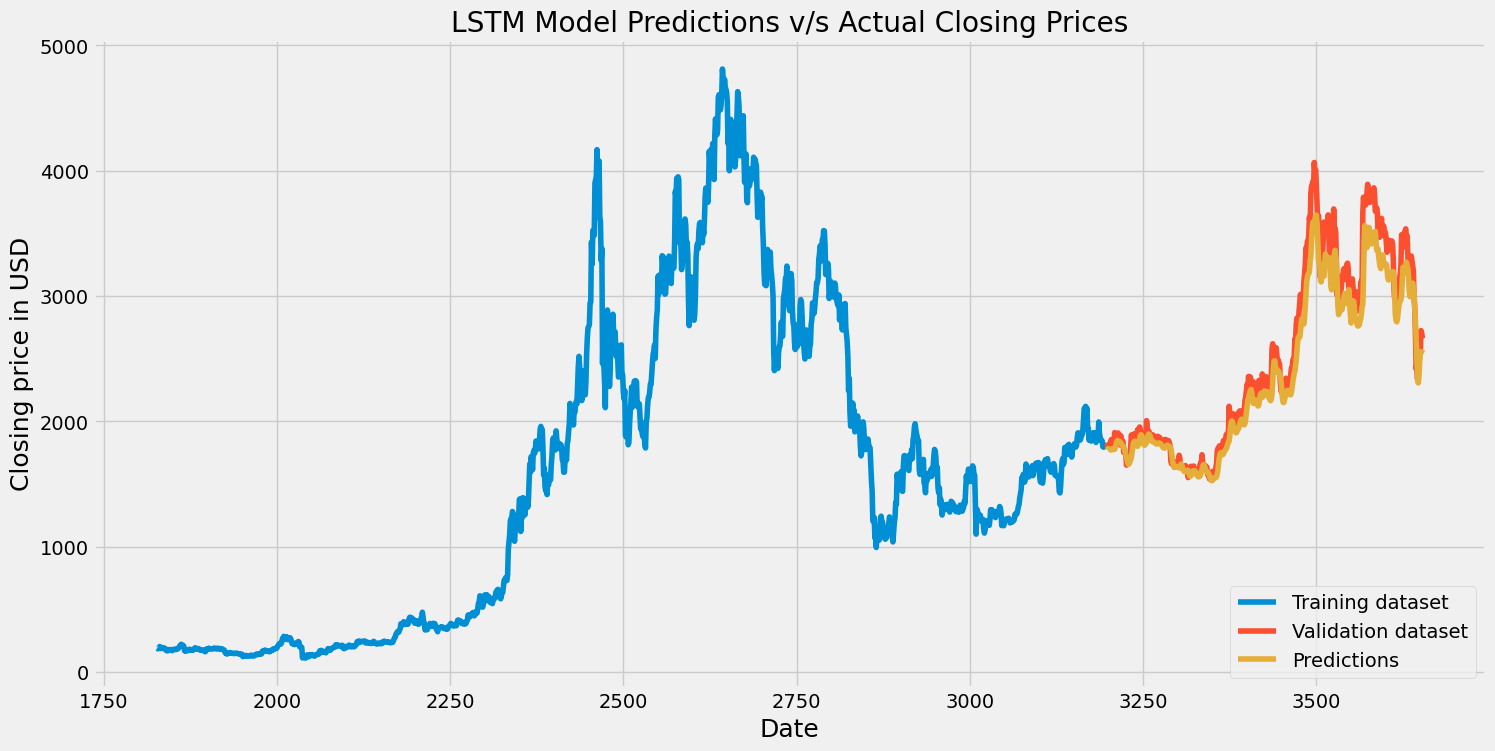

In [50]:
# Plot the data.
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions


plt.figure(figsize=(16, 8))
plt.title("LSTM Model Predictions v/s Actual Closing Prices")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing price in USD", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Training dataset", "Validation dataset", "Predictions"], loc="lower right")
plt.show()
plt.savefig('Ethereum.png')
plt.close()

In [51]:
valid

,Close,Predictions
3198,1821.859619,1772.624146
3199,1801.728516,1780.397339
3200,1812.589478,1781.557373
3201,1820.478027,1778.176880
3202,1804.531372,1775.440430
...,...,...
3649,2610.022949,2461.547119
3650,2553.252197,2542.359619
3651,2724.431885,2549.947510
3652,2703.671875,2556.828613


In [52]:
valid.to_csv('Ethereum_pred.csv', index=False)

In [53]:
train_data

array([[0.01656843],
       [0.01591715],
       [0.01596982],
       ...,
       [0.35943885],
       [0.36306514],
       [0.3644629 ]])

In [54]:
current_feature = train_data[-d:]
num_days, curr_day = 100, 0
while curr_day < num_days:
    prediction = model.predict(current_feature.reshape(1, d, 1))
    curr_day += 1
    current_feature = np.append(current_feature, prediction)
    prediction = scaler.inverse_transform(prediction)
    current_feature = current_feature[1:]

print(prediction)

1/1 [==============================] - 0s 49ms/step
[[1166.3378]]


Epoch 1/5
273/273 [==============================] - 16s 19ms/step - loss: 0.0557
Epoch 2/5
273/273 [==============================] - 5s 17ms/step - loss: 0.0358
Epoch 3/5
273/273 [==============================] - 5s 19ms/step - loss: 0.0352
Epoch 4/5
273/273 [==============================] - 5s 18ms/step - loss: 0.0345
Epoch 5/5
15/15 [==============================] - 7s 9ms/step
Epoch 1/5
273/273 [==============================] - 19s 25ms/step - loss: 0.0591
Epoch 2/5
273/273 [==============================] - 7s 25ms/step - loss: 0.0427
Epoch 3/5
273/273 [==============================] - 7s 25ms/step - loss: 0.0361
Epoch 4/5
273/273 [==============================] - 7s 25ms/step - loss: 0.0357
Epoch 5/5
15/15 [==============================] - 2s 12ms/step
Epoch 1/5
269/269 [==============================] - 27s 57ms/step - loss: 0.0629
Epoch 2/5
269/269 [==============================] - 15s 58ms/step - loss: 0.0427
Epoch 3/5
269/269 [==============================] - 16s 61

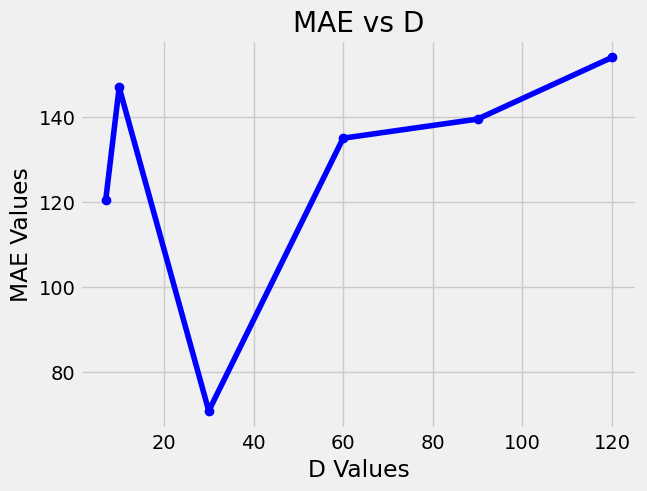

In [55]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

"""This code is designed to find the optimal value for d—the number of past days used to predict the next closing price in a time series model using an LSTM architecture.
It iterates over a set of different d values (7, 10, 30, 60, 90, 120), trains an LSTM model for each value of d, and evaluates its performance using Mean Absolute Error (MAE). """

d_values = [7, 10, 30, 60, 90, 120]
mae_values = []

for d in d_values:
  
    df = pd.read_csv("cryptocurrencies_combined_daily.csv")
    df = df[df['Cryptocurrency'] == "Ethereum"]

   
    if df.empty:
        print(f"No data available for Ethereum after filtering for d = {d}. Skipping this iteration.")
        continue

    # Create a new dataframe with only the "Close" column
    data = df.filter(["Close"])

   
    dataset = data.values

   
    if len(dataset) == 0:
        print(f"No data available in the dataset for d = {d}. Skipping this iteration.")
        continue

    
    training_data_len = int(math.ceil(0.75 * len(dataset)))

    # Data preprocessing
    scaler = MinMaxScaler(feature_range=(0, 1))

    if training_data_len == 0:
        print(f"Not enough data to split for training for d = {d}. Skipping this iteration.")
        continue

    scaled_data = scaler.fit_transform(dataset)

    # Training the model
    
    train_data = scaled_data[:training_data_len, :]

    x_train, y_train = [], []
    for i in range(d, len(train_data)):
        x_train.append(train_data[i - d:i, 0])
        y_train.append(train_data[i, 0])

    # Check if x_train and y_train contain data
    if len(x_train) == 0 or len(y_train) == 0:
        print(f"No training data available for d = {d}. Skipping this iteration.")
        continue

    
    x_train, y_train = np.array(x_train), np.array(y_train)

   
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM Model Architecture
    model1 = Sequential()
    model1.add(LSTM(125, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model1.add(LSTM(100, return_sequences=True))
    model1.add(LSTM(70, return_sequences=True))
    model1.add(LSTM(50, return_sequences=True))
    model1.add(LSTM(30, return_sequences=False))

   
    model1.add(Dense(25))
    model1.add(Dense(1))

    # Compile the model
    model1.compile(optimizer="adam", loss="mean_absolute_error")

    # Train the model
    model1.fit(x_train, y_train, batch_size=5, epochs=5)

    # Create the testing dataset
    test_data = scaled_data[training_data_len - d:, :]

    # Create the datasets x_test and y_test
    x_test = []
    y_test = dataset[training_data_len:, :]

    for i in range(d, len(test_data)):
        x_test.append(test_data[i - d:i, 0])

    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

   
    if len(x_test) == 0:
        print(f"No testing data available for d = {d}. Skipping this iteration.")
        continue

    predictions = model1.predict(x_test)

    predictions = scaler.inverse_transform(predictions)

   
    mae = np.mean(np.abs(predictions - y_test))
    mae_values.append(mae)

# Plot the MAE values against d_values
plt.plot(d_values, mae_values, marker='o', linestyle='-', color='b')


plt.title('MAE vs D')
plt.xlabel('D Values')
plt.ylabel('MAE Values')

# Show the plot
plt.grid(True)
plt.show()


In [57]:
with open('Ethereum.pkl','wb') as file:
    pickle.dump(model, file)

In [58]:
import pickle